In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

In [95]:
# This sets some plotting things
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [96]:
# Extract liquids
out=pt.import_excel('Liquid_LaPalma2021.xlsx', sheet_name="Liquids")
my_input=out['my_input']
myLiquids1=out['Liqs']

# Extract Cpx
out=pt.import_excel('Clinopyroxene.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
Cpxs=out['Cpxs']

In [97]:
display(myLiquids1.head())
display(Cpxs.head())

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,44.07175,3.85725,15.25960,13.34025,0.20820,5.66615,10.29020,4.52895,1.86295,0.0,1.02940,0.0,0.0,0.0,0.0,0.0,0
1,43.48885,3.91850,14.90475,13.60110,0.20900,6.08415,10.58290,4.32170,1.76735,0.0,1.04805,0.0,0.0,0.0,0.0,0.0,1
2,43.70050,3.79525,14.27875,13.68300,0.20410,7.09470,10.71260,4.05095,1.69220,0.0,0.87835,0.0,0.0,0.0,0.0,0.0,2
3,43.78955,3.92430,14.97935,13.59335,0.21130,6.01875,10.60035,4.36675,1.78950,0.0,1.06400,0.0,0.0,0.0,0.0,0.0,3
4,43.55010,3.75070,14.36795,13.42620,0.20385,6.72320,10.60040,4.14975,1.72045,0.0,0.91410,0.0,0.0,0.0,0.0,0.0,4


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,0
1,45.7765,3.22437,8.26296,8.78043,0.176955,10.6986,22.1711,0.751485,0.000000,0.016159,1
2,44.6986,3.32633,9.08447,9.05639,0.173568,10.5814,22.0897,0.907719,0.001525,0.000000,2
3,45.2122,3.26010,8.91100,8.67503,0.191869,10.8647,22.3832,0.962975,0.004363,0.010779,3
4,46.6183,2.92108,7.91121,8.38594,0.160977,11.7110,22.1802,0.872040,0.000000,0.000000,4


In [98]:
# MM_N17P08
# barometer of Neave and Putirka (2017), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_N17P08=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Neave2017", equationT="T_Put2008_eq33", 
                                         Kd_Match=0.27, Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06,
                                         H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)

MM_N17P08_Avs=MM_N17P08['Av_PTs']
MM_N17P08_All=MM_N17P08['All_PTs']

display(MM_N17P08_All)

MM_N17P08_All.to_excel('Cpx-Melt_match_N17P08_All.xlsx')
MM_N17P08_Avs.to_excel('Cpx-Melt_match_N17P08_Avs.xlsx')

MM_N17P08_All_filter = MM_N17P08_All[MM_N17P08_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
the code is evaluating Kd matches using Kd=0.27
1781 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1691 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,DeltaKd_userselected=0.27,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,DeltaKd_Kd_Match_userSp,Sample_ID_Liq
0,0,11.731507,1402.098724,0.0,0.0,False,0.005883,0.095555,0.007636,0.005710,0.022823,0.081914,0.030153,0.000402,0.006421,0.000438,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,3.600700,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1295.518681,1506.269977,0.263680,0.174007,-0.005883,0.755876,0.030153,0.723866,0.001857,0.643809,-0.081914,0.088740,0.005710,0.090666,0.007636,0.014013,-0.022823,0.0,0.000402,0.130985,0.006421,0.026758,0.031764,0.031764,0.000438,49
1,0,10.312134,1418.897202,0.0,0.0,False,0.008220,0.104663,0.009895,0.013822,0.022105,0.069539,0.048300,0.000402,0.005991,0.005755,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,3.467795,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.72572

In [99]:
# MM_M13
# Barometer and thermometer of Masotta et al. (2013) for alkaline compositions
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# Kd Kd model of Masotta et al. (2013),which is also a function of Na and K, for trachytic and phonolitic magmas
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_M13=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs, 
                                    equationP="P_Mas2013_Palk2012", equationT="T_Mas2013_Talk2012",
                                    Kd_Match="Masotta", Kd_Err=0.08, Fe3Fet_Liq=0.15, CaTs_Err=0.06, DiHd_Err=0.12, EnFs_Err=0.06, H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)

MM_M13_Avs=MM_M13['Av_PTs']
MM_M13_All=MM_M13['All_PTs']

display(MM_M13_All)

MM_M13_All.to_excel('Cpx-Melt_match_M13.xlsx')
MM_M13_Avs.to_excel('Cpx-Melt_match_M13_Avs.xlsx')

MM_M13_All_filter = MM_M13_All[MM_M13_All['Eq Tests Neave2017?']]


Caution, you have selected to use the Kd-Fe-Mg model of Masotta et al. (2013)which is only valid for trachyte and phonolitic magmas.  use PutKd=True to use the Kd model of Putirka (2008)
Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
2564 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=2562 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,5.116443,1311.046111,0.0,0.0,True,0.013379,0.064057,0.025342,0.014200,0.025274,0.026007,0.178370,0.000402,0.001249,48.35174,2.750769,17.35994,9.614661,0.248157,2.421511,6.873326,6.151204,3.564831,0.0,1.527760,3.765204,0.15,0.0,0.0,0.0,0.544748,0.040670,0.002368,0.090589,0.082971,0.115255,0.067183,0.025618,0.023311,0.007286,0.0,0.448226,0.033464,0.001948,0.074538,0.068269,0.189666,0.110559,0.042158,0.019181,0.011990,0.0,0.309841,0.345621,85,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.228778,0.173551,0.194462,2.631262,-3.562970,-3.562970,0.238784,0.309841,0.345621,0.010005,1311.046111,1311.046111,0.242158,0.164721,0.013379,0.904093,0.178370,1.008755,0.283032,0.751730,0.026007,0.097230,0.014200,0.108372,0.025342,0.011561,-0.025274,0.0,0.000402,0.125813,0.001249,0.028935,0.029587,0.029587,85
1,0,5.915016,1303.796243,0.0,0.0,False,0.059584,0.026596,0.020329,0.028444,0.022910,0.004328,0.263649,0.000402,0.002903,46.79586,3.599172,17.73281,11.265500,0.208899,2.242437,8.022268,4.772655,2.345213,0.0,1.634186,3.656370,0.15,0.0,0.0,0.0,0.529941,0.037857,0.002004,0.106691,0.097340,0.118338,0.052396,0.016941,0.030659,0.007834,0.0,0.443277,0.031666,0.001676,0.089243,0.081421,0.197971,0.087655,0.028341,0.025645,0.013106,0.0,0.261894,0.294500,86,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.180814,0.137166,0.153692,2.842756,-3.084614,-

In [100]:
# MM_P03
# barometer of Putirka (2003), and the thermometer of Putirka (2003)
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_P03=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2003", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06,
                                         H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)

MM_P03_Avs=MM_P03['Av_PTs']
MM_P03_All=MM_P03['All_PTs']

display(MM_P03_All)

MM_P03_All.to_excel('Cpx-Melt_match_P03.xlsx')
MM_P03_Avs.to_excel('Cpx-Melt_match_P03_Avs.xlsx')

MM_P03_All_filter = MM_P03_All[MM_P03_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2137 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1515 Cpx-Liq matches using the specified filter. N=33 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,8.332805,1391.881142,0.0,0.0,True,0.008245,0.098317,0.017282,0.007862,0.022992,0.046951,0.051717,0.000402,0.007160,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,3.600700,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1369.790802,1418.925807,0.256164,0.267542,0.261317,0.171245,-0.008245,0.777440,0.051717,0.818533,0.092810,0.678772,-0.046951,0.090891,0.007862,0.100312,0.017282,0.013844,-0.022992,0.0,0.000402,0.131724,0.007160,0.026743,0.031779,0.031779,49
1,0,8.590514,1427.596856,0.0,0.0,False,0.006237,0.102403,0.016330,0.012023,0.021963,0.060875,0.031387,0.000402,0.006536,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,3.467795,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.2091

In [101]:
# MM_P03_P08
# barometer of Putirka (2003), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_P03P08=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06,
                                         H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)

MM_P03P08_Avs=MM_P03P08['Av_PTs']
MM_P03P08_All=MM_P03P08['All_PTs']

display(MM_P03P08_All)

MM_P03P08_All.to_excel('Cpx-Melt_match_P03P08.xlsx')
MM_P03P08_Avs.to_excel('Cpx-Melt_match_P03P08_Avs.xlsx')

MM_P03P08_All_filter = MM_P03P08_All[MM_P03P08_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3323 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1883 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,8.062373,1382.890214,0.0,0.0,True,0.010335,0.100744,0.017095,0.009859,0.023138,0.038425,0.071785,0.000402,0.007823,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,3.600700,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1295.518681,1506.269977,0.238382,0.287012,0.259228,0.168818,-0.010335,0.797508,0.071785,0.825087,0.099364,0.687298,-0.038425,0.092889,0.009859,0.100125,0.017095,0.013698,-0.023138,0.0,0.000402,0.132387,0.007823,0.026742,0.031780,0.031780,49
1,0,7.926511,1406.046815,0.0,0.0,True,0.011166,0.107998,0.015998,0.016640,0.022321,0.041283,0.074859,0.000402,0.005167,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,3.467795,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.20918

In [102]:
# MM_P08
# barometer of Putirka (2008) eq 30, and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_P08=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2008_eq30", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06,
                                         H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)

MM_P08_Avs=MM_P08['Av_PTs']
MM_P08_All=MM_P08['All_PTs']

display(MM_P08_All)

MM_P08_All.to_excel('Cpx-Melt_match_P08.xlsx')
MM_P08_Avs.to_excel('Cpx-Melt_match_P08_Avs.xlsx')

MM_P08_All_filter = MM_P08_All[MM_P08_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3323 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1744 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,11.177071,1399.162004,0.0,0.0,False,0.006560,0.096350,0.008986,0.006316,0.022871,0.075577,0.036221,0.000402,0.006632,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,3.600700,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1295.518681,1506.269977,0.238382,0.287012,0.263002,0.173213,-0.006560,0.761944,0.036221,0.738147,0.012424,0.650146,-0.075577,0.089346,0.006316,0.092016,0.008986,0.013965,-0.022871,0.0,0.000402,0.131196,0.006632,0.026756,0.031767,0.031767,49
1,0,11.745716,1426.732944,0.0,0.0,False,0.006434,0.102628,0.006471,0.012198,0.021973,0.085788,0.033030,0.000402,0.006483,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,3.467795,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.2

In [103]:
# MM_P96
# barometer of Putirka et al. (1996) eq P2, and the thermometer of Putirka et al. (1996) eq T2
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_P96=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put1996_eqP2", equationT="T_Put1996_eqT2", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06,
                                         H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)

MM_P96_Avs=MM_P96['Av_PTs']
MM_P96_All=MM_P96['All_PTs']

display(MM_P96_All)

MM_P96_All.to_excel('Cpx-Melt_match_P96.xlsx')
MM_P96_Avs.to_excel('Cpx-Melt_match_P96_Avs.xlsx')

MM_P96_All_filter = MM_P96_All[MM_P96_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2784 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1189 Cpx-Liq matches using the specified filter. N=28 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
1,0,9.890024,1444.396687,0.0,0.0,False,0.003756,0.084087,0.018406,0.002027,0.022147,0.092543,0.046871,0.000402,0.003515,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,3.600700,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1365.913782,1533.482133,0.255253,0.292884,0.273319,0.185476,0.003756,0.678852,-0.046871,0.783453,0.057730,0.633179,-0.092543,0.081003,-0.002027,0.101436,0.018406,0.014689,-0.022147,0.0,0.000402,0.128079,0.003515,0.026748,0.031774,0.031774,49
2,0,11.348781,1461.975549,0.0,0.0,False,0.001503,0.093454,0.011555,0.005677,0.021394,0.102753,0.027984,0.000402,0.008607,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,3.467795,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.2

In [104]:
# MM_N17_P08_1H2O
#barometer of Neave and Putirka (2017), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 1 wt.% water content

MM_N17P08_1H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Neave2017", equationT="T_Put2008_eq33", 
                                         Kd_Match=0.27, Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=1)

MM_N17P08_1H20_Avs=MM_N17P08_1H20['Av_PTs']
MM_N17P08_1H20_All=MM_N17P08_1H20['All_PTs']

display(MM_N17P08_1H20_All)

MM_N17P08_1H20_All.to_excel('Cpx-Melt_match_N17P08_1H20_All.xlsx')
MM_N17P08_1H20_Avs.to_excel('Cpx-Melt_match_N17P08_1H20_Avs.xlsx')

MM_N17P08_1H20_All_filter = MM_N17P08_1H20_All[MM_N17P08_1H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
the code is evaluating Kd matches using Kd=0.27
1781 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1582 Cpx-Liq matches using the specified filter. N=40 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,DeltaKd_userselected=0.27,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,DeltaKd_Kd_Match_userSp,Sample_ID_Liq
0,0,12.176943,1441.318941,0.0,0.0,False,0.003063,0.084923,0.010809,0.001521,0.022193,0.108282,0.041861,0.000402,0.003718,0.000438,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,1,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1326.811243,1548.738707,0.272625,0.184640,0.003063,0.683862,-0.041861,0.721189,0.004534,0.617441,-0.108282,0.081508,-0.001521,0.093839,0.010809,0.014643,-0.022193,0.0,0.000402,0.128282,0.003718,0.026758,0.031764,0.031764,0.000438,49
1,0,10.787013,1457.267201,0.0,0.0,False,0.000452,0.094681,0.012747,0.006479,0.021472,0.095890,0.020500,0.000402,0.008331,0.005755,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,1,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.

In [105]:
# MM_M13_1H2O
# Barometer and thermometer of Masotta et al. (2013) for alkaline compositions
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# Kd Kd model of Masotta et al. (2013),which is also a function of Na and K, for trachytic and phonolitic magmas
# we set 1 wt.% water content

MM_M13_1H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs, 
                                    equationP="P_Mas2013_Palk2012", equationT="T_Mas2013_Talk2012",
                                    Kd_Match="Masotta", Kd_Err=0.08, Fe3Fet_Liq=0.15, CaTs_Err=0.06, DiHd_Err=0.12, EnFs_Err=0.06, H2O_Liq=1)

MM_M13_1H20_Avs=MM_M13_1H20['Av_PTs']
MM_M13_1H20_All=MM_M13_1H20['All_PTs']

display(MM_M13_1H20_All)

MM_M13_1H20_All.to_excel('Cpx-Melt_match_M13_1H20.xlsx')
MM_M13_1H20_Avs.to_excel('Cpx-Melt_match_M13_1H20_Avs.xlsx')

MM_M13_1H20_All_filter = MM_M13_1H20_All[MM_M13_1H20_All['Eq Tests Neave2017?']]


Caution, you have selected to use the Kd-Fe-Mg model of Masotta et al. (2013)which is only valid for trachyte and phonolitic magmas.  use PutKd=True to use the Kd model of Putirka (2008)
Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
2719 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=2717 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,4.911737,1329.150529,0.0,0.0,True,0.017743,0.058744,0.028659,0.009095,0.024999,0.012624,0.123364,0.000402,0.000148,48.35174,2.750769,17.35994,9.614661,0.248157,2.421511,6.873326,6.151204,3.564831,0.0,1.527760,1,0.15,0.0,0.0,0.0,0.544748,0.040670,0.002368,0.090589,0.082971,0.115255,0.067183,0.025618,0.023311,0.007286,0.0,0.448226,0.033464,0.001948,0.074538,0.068269,0.189666,0.110559,0.042158,0.019181,0.011990,0.0,0.309841,0.345621,85,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.228778,0.173551,0.194462,2.631262,-3.562970,-3.562970,0.238784,0.309841,0.345621,0.010005,1329.150529,1329.150529,0.246521,0.170035,0.017743,0.849087,0.123364,1.019889,0.294166,0.738347,0.012624,0.092125,0.009095,0.111689,0.028659,0.011836,-0.024999,0.0,0.000402,0.124416,0.000148,0.028933,0.029589,0.029589,85
1,0,5.718367,1320.985682,0.0,0.0,False,0.063744,0.021820,0.023410,0.022750,0.022592,0.016559,0.205130,0.000402,0.001544,46.79586,3.599172,17.73281,11.265500,0.208899,2.242437,8.022268,4.772655,2.345213,0.0,1.634186,1,0.15,0.0,0.0,0.0,0.529941,0.037857,0.002004,0.106691,0.097340,0.118338,0.052396,0.016941,0.030659,0.007834,0.0,0.443277,0.031666,0.001676,0.089243,0.081421,0.197971,0.087655,0.028341,0.025645,0.013106,0.0,0.261894,0.294500,86,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.180814,0.137166,0.153692,2.842756,-3.084614,-3.084614,0.238

In [106]:
# MM_P03_1H20
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2003) 
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 1 wt.% water content

MM_P03_1H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2003", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=1)

MM_P03_1H20_Avs=MM_P03_1H20['Av_PTs']
MM_P03_1H20_All=MM_P03_1H20['All_PTs']

display(MM_P03_1H20_All)

MM_P03_1H20_All.to_excel('Cpx-Melt_match_P03_1H20.xlsx')
MM_P03_1H20_Avs.to_excel('Cpx-Melt_match_P03_1H20_Avs.xlsx')

MM_P03_1H20_All_filter = MM_P03_1H20_All[MM_P03_1H20_All['Eq Tests Neave2017?']]

C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2137 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1515 Cpx-Liq matches using the specified filter. N=33 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,8.332805,1391.881142,0.0,0.0,True,0.008245,0.098317,0.017282,0.007862,0.022992,0.046951,0.051717,0.000402,0.007160,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,1,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1369.790802,1418.925807,0.256164,0.267542,0.261317,0.171245,-0.008245,0.777440,0.051717,0.818533,0.092810,0.678772,-0.046951,0.090891,0.007862,0.100312,0.017282,0.013844,-0.022992,0.0,0.000402,0.131724,0.007160,0.026743,0.031779,0.031779,49
1,0,8.590514,1427.596856,0.0,0.0,False,0.006237,0.102403,0.016330,0.012023,0.021963,0.060875,0.031387,0.000402,0.006536,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,1,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.209188,0.275755,3.

In [107]:
# MM_P03P08_1H20
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 1 wt.% water content

MM_P03P08_1H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=1)

MM_P03P08_1H20_Avs=MM_P03P08_1H20['Av_PTs']
MM_P03P08_1H20_All=MM_P03P08_1H20['All_PTs']

display(MM_P03P08_1H20_All)

MM_P03P08_1H20_All.to_excel('Cpx-Melt_match_P03P08_1H20.xlsx')
MM_P03P08_1H20_Avs.to_excel('Cpx-Melt_match_P03P08_1H20_Avs.xlsx')

MM_P03P08_1H20_All_filter = MM_P03P08_1H20_All[MM_P03P08_1H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3140 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1475 Cpx-Liq matches using the specified filter. N=34 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
1,0,9.347691,1425.622543,0.0,0.0,False,0.000494,0.089183,0.017965,0.001190,0.022448,0.077104,0.014936,0.000402,0.004776,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,1,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1326.811243,1548.738707,0.245960,0.296136,0.269069,0.180379,-0.000494,0.710787,-0.014936,0.795109,0.069386,0.648619,-0.077104,0.084220,0.001190,0.100995,0.017965,0.014388,-0.022448,0.0,0.000402,0.129340,0.004776,0.026747,0.031775,0.031775,49
2,0,9.231597,1448.403011,0.0,0.0,False,0.001535,0.096990,0.016643,0.008045,0.021620,0.078729,0.005878,0.000402,0.007806,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,1,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.209188,0.275755,

In [108]:
# MM_P08_1H20
# barometer of Putirka (2008) eq 30, and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 1 wt.% water content

MM_P08_1H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2008_eq30", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=1)

MM_P08_1H20_Avs=MM_P08_1H20['Av_PTs']
MM_P08_1H20_All=MM_P08_1H20['All_PTs']

display(MM_P08_1H20_All)

MM_P08_1H20_All.to_excel('Cpx-Melt_match_P08_1H20.xlsx')
MM_P08_1H20_Avs.to_excel('Cpx-Melt_match_P08_1H20_Avs.xlsx')

MM_P08_1H20_All_filter = MM_P08_1H20_All[MM_P08_1H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3140 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1642 Cpx-Liq matches using the specified filter. N=41 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
1,0,10.368336,1431.245397,0.0,0.0,False,0.000784,0.087658,0.015299,0.000193,0.022356,0.088585,0.024854,0.000402,0.004393,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,1,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1326.811243,1548.738707,0.245960,0.296136,0.270346,0.181905,0.000784,0.700869,-0.024854,0.767409,0.041686,0.637138,-0.088585,0.083223,0.000193,0.098329,0.015299,0.014480,-0.022356,0.0,0.000402,0.128957,0.004393,0.026751,0.031771,0.031771,49
2,0,11.066785,1458.873124,0.0,0.0,False,0.000811,0.094262,0.012069,0.006203,0.021446,0.098913,0.023075,0.000402,0.008426,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,1,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.209188,0.275755

In [109]:
# MM_P96_1H2O
# barometer of Putirka et al. (1996) eq P2, and the thermometer of Putirka et al. (1996) eq T2
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 1 wt.% water content

MM_P96_1H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put1996_eqP2", equationT="T_Put1996_eqT2", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=1)

MM_P96_1H20_Avs=MM_P96_1H20['Av_PTs']
MM_P96_1H20_All=MM_P96_1H20['All_PTs']

display(MM_P96_1H20_All)

MM_P96_1H20_All.to_excel('Cpx-Melt_match_P96_1H20.xlsx')
MM_P96_1H20_Avs.to_excel('Cpx-Melt_match_P96_1H20_Avs.xlsx')

MM_P96_1H20_All_filter = MM_P96_1H20_All[MM_P96_1H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2784 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1189 Cpx-Liq matches using the specified filter. N=28 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
1,0,9.890024,1444.396687,0.0,0.0,False,0.003756,0.084087,0.018406,0.002027,0.022147,0.092543,0.046871,0.000402,0.003515,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,1,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1365.913782,1533.482133,0.255253,0.292884,0.273319,0.185476,0.003756,0.678852,-0.046871,0.783453,0.057730,0.633179,-0.092543,0.081003,-0.002027,0.101436,0.018406,0.014689,-0.022147,0.0,0.000402,0.128079,0.003515,0.026748,0.031774,0.031774,49
2,0,11.348781,1461.975549,0.0,0.0,False,0.001503,0.093454,0.011555,0.005677,0.021394,0.102753,0.027984,0.000402,0.008607,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,1,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.209188,0.275755

In [110]:
# MM_N17P08_2H2O
# barometer of Neave and Putirka (2017), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 2 wt.% water content

MM_N17P08_2H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Neave2017", equationT="T_Put2008_eq33", 
                                         Kd_Match=0.27, Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=2)

MM_N17P08_2H20_Avs=MM_N17P08_2H20['Av_PTs']
MM_N17P08_2H20_All=MM_N17P08_2H20['All_PTs']

display(MM_N17P08_2H20_All)

MM_N17P08_2H20_All.to_excel('Cpx-Melt_match_N17P08_2H20_All.xlsx')
MM_N17P08_2H20_Avs.to_excel('Cpx-Melt_match_N17P08_2H20_Avs.xlsx')

MM_N17P08_2H20_All_filter = MM_N17P08_2H20_All[MM_N17P08_2H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
the code is evaluating Kd matches using Kd=0.27
1781 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1635 Cpx-Liq matches using the specified filter. N=41 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,DeltaKd_userselected=0.27,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,DeltaKd_Kd_Match_userSp,Sample_ID_Liq
0,0,12.002556,1425.964343,0.0,0.0,False,0.000416,0.089091,0.009575,0.001129,0.022439,0.098262,0.015548,0.000402,0.004752,0.000438,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,2,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1314.601645,1532.128638,0.269146,0.180472,-0.000416,0.710175,-0.015548,0.722218,0.003505,0.627461,-0.098262,0.084159,0.001129,0.092605,0.009575,0.014397,-0.022439,0.0,0.000402,0.129316,0.004752,0.026758,0.031764,0.031764,0.000438,49
1,0,10.591293,1441.453082,0.0,0.0,False,0.003100,0.098799,0.011579,0.009325,0.021732,0.085330,0.006095,0.000402,0.007387,0.005755,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,2,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.

In [111]:
# MM_M13_2H2O
# Barometer and thermometer of Masotta et al. (2013) for alkaline compositions
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# Kd Kd model of Masotta et al. (2013),which is also a function of Na and K, for trachytic and phonolitic magmas
# we set 2 wt.% water content

MM_M13_2H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs, 
                                    equationP="P_Mas2013_Palk2012", equationT="T_Mas2013_Talk2012",
                                    Kd_Match="Masotta", Kd_Err=0.08, Fe3Fet_Liq=0.15, CaTs_Err=0.06, DiHd_Err=0.12, EnFs_Err=0.06, H2O_Liq=2)

MM_M13_2H20_Avs=MM_M13_2H20['Av_PTs']
MM_M13_2H20_All=MM_M13_2H20['All_PTs']

display(MM_M13_2H20_All)

MM_M13_2H20_All.to_excel('Cpx-Melt_match_M13_2H20.xlsx')
MM_M13_2H20_Avs.to_excel('Cpx-Melt_match_M13_2H20_Avs.xlsx')

MM_M13_2H20_All_filter = MM_M13_2H20_All[MM_M13_2H20_All['Eq Tests Neave2017?']]


Caution, you have selected to use the Kd-Fe-Mg model of Masotta et al. (2013)which is only valid for trachyte and phonolitic magmas.  use PutKd=True to use the Kd model of Putirka (2008)
Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
2666 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=2665 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,4.985766,1322.545874,0.0,0.0,True,0.016156,0.060685,0.027451,0.010893,0.025100,0.017443,0.142694,0.000402,0.000355,48.35174,2.750769,17.35994,9.614661,0.248157,2.421511,6.873326,6.151204,3.564831,0.0,1.527760,2,0.15,0.0,0.0,0.0,0.544748,0.040670,0.002368,0.090589,0.082971,0.115255,0.067183,0.025618,0.023311,0.007286,0.0,0.448226,0.033464,0.001948,0.074538,0.068269,0.189666,0.110559,0.042158,0.019181,0.011990,0.0,0.309841,0.345621,85,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.228778,0.173551,0.194462,2.631262,-3.562970,-3.562970,0.238784,0.309841,0.345621,0.010005,1322.545874,1322.545874,0.244934,0.168093,0.016156,0.868417,0.142694,1.015874,0.290151,0.743166,0.017443,0.093923,0.010893,0.110480,0.027451,0.011736,-0.025100,0.0,0.000402,0.124919,0.000355,0.028934,0.029588,0.029588,85
1,0,5.792396,1314.461722,0.0,0.0,False,0.062170,0.023635,0.022242,0.024841,0.022712,0.011974,0.226575,0.000402,0.002054,46.79586,3.599172,17.73281,11.265500,0.208899,2.242437,8.022268,4.772655,2.345213,0.0,1.634186,2,0.15,0.0,0.0,0.0,0.529941,0.037857,0.002004,0.106691,0.097340,0.118338,0.052396,0.016941,0.030659,0.007834,0.0,0.443277,0.031666,0.001676,0.089243,0.081421,0.197971,0.087655,0.028341,0.025645,0.013106,0.0,0.261894,0.294500,86,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.180814,0.137166,0.153692,2.842756,-3.084614,-3.084614,0.238

In [112]:
# MM_P03_2H2O
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2003)
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 2 wt.% water content

MM_P03_2H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2003", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=2)

MM_P03_2H20_Avs=MM_P03_2H20['Av_PTs']
MM_P03_2H20_All=MM_P03_2H20['All_PTs']

display(MM_P03_2H20_All)

MM_P03_2H20_All.to_excel('Cpx-Melt_match_P03_2H20.xlsx')
MM_P03_2H20_Avs.to_excel('Cpx-Melt_match_P03_2H20_Avs.xlsx')

MM_P03_2H20_All_filter = MM_P03_2H20_All[MM_P03_2H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2137 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1515 Cpx-Liq matches using the specified filter. N=33 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,8.332805,1391.881142,0.0,0.0,True,0.008245,0.098317,0.017282,0.007862,0.022992,0.046951,0.051717,0.000402,0.007160,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,2,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1369.790802,1418.925807,0.256164,0.267542,0.261317,0.171245,-0.008245,0.777440,0.051717,0.818533,0.092810,0.678772,-0.046951,0.090891,0.007862,0.100312,0.017282,0.013844,-0.022992,0.0,0.000402,0.131724,0.007160,0.026743,0.031779,0.031779,49
1,0,8.590514,1427.596856,0.0,0.0,False,0.006237,0.102403,0.016330,0.012023,0.021963,0.060875,0.031387,0.000402,0.006536,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,2,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.209188,0.275755,3.

In [113]:
# MM_P03P08_2H2O
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 2 wt.% water content

MM_P03P08_2H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=2)

MM_P03P08_2H20_Avs=MM_P03P08_2H20['Av_PTs']
MM_P03P08_2H20_All=MM_P03P08_2H20['All_PTs']

display(MM_P03P08_2H20_All)

MM_P03P08_2H20_All.to_excel('Cpx-Melt_match_P03P08_2H20.xlsx')
MM_P03P08_2H20_Avs.to_excel('Cpx-Melt_match_P03P08_2H20_Avs.xlsx')

MM_P03P08_2H20_All_filter = MM_P03P08_2H20_All[MM_P03P08_2H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3220 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1639 Cpx-Liq matches using the specified filter. N=40 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,8.842397,1408.823272,0.0,0.0,False,0.004335,0.093736,0.017628,0.004358,0.022718,0.062443,0.016641,0.000402,0.005943,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,2,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1314.601645,1532.128638,0.243018,0.292594,0.265228,0.175827,-0.004335,0.742364,0.016641,0.806546,0.080823,0.663280,-0.062443,0.087388,0.004358,0.100658,0.017628,0.014118,-0.022718,0.0,0.000402,0.130507,0.005943,0.026745,0.031777,0.031777,49
1,0,8.691467,1430.873239,0.0,0.0,False,0.005493,0.101551,0.016380,0.011367,0.021909,0.063754,0.025229,0.000402,0.006740,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,2,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.209188,0.275755,3

In [114]:
# MM_P08_2H2O
# barometer of Putirka (2008) eq 30, and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 2 wt.% water content

MM_P08_2H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2008_eq30", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=2)

MM_P08_2H20_Avs=MM_P08_2H20['Av_PTs']
MM_P08_2H20_All=MM_P08_2H20['All_PTs']

display(MM_P08_2H20_All)

MM_P08_2H20_All.to_excel('Cpx-Melt_match_P08_2H20.xlsx')
MM_P08_2H20_Avs.to_excel('Cpx-Melt_match_P08_2H20_Avs.xlsx')

MM_P08_2H20_All_filter = MM_P08_2H20_All[MM_P08_2H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3220 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1705 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,10.671473,1418.693807,0.0,0.0,False,0.002074,0.091062,0.012856,0.002462,0.022557,0.083491,0.002276,0.000402,0.005253,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,2,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1314.601645,1532.128638,0.243018,0.292594,0.267489,0.178501,-0.002074,0.723447,-0.002276,0.756349,0.030626,0.642232,-0.083491,0.085492,0.002462,0.095886,0.012856,0.014279,-0.022557,0.0,0.000402,0.129817,0.005253,0.026753,0.031769,0.031769,49
1,0,11.333752,1445.630365,0.0,0.0,False,0.002158,0.097712,0.009790,0.008550,0.021662,0.093510,0.001157,0.000402,0.007639,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,2,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.209188,0.27575

In [115]:
# MM_P96_2H20
# barometer of Putirka et al. (1996) eq P2, and the thermometer of Putirka et al. (1996) eq T2
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# following Scruggs and Putirka (2017), we set water based on melt SiO2 content

MM_P96_2H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put1996_eqP2", equationT="T_Put1996_eqT2", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=2)

MM_P96_2H20_Avs=MM_P96_2H20['Av_PTs']
MM_P96_2H20_All=MM_P96_2H20['All_PTs']

display(MM_P96_2H20_All)

MM_P96_2H20_All.to_excel('Cpx-Melt_match_P96_2H20.xlsx')
MM_P96_2H20_Avs.to_excel('Cpx-Melt_match_P96_2H20_Avs.xlsx')

MM_P96_2H20_All_filter = MM_P96_2H20_All[MM_P96_2H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2784 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1189 Cpx-Liq matches using the specified filter. N=28 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
1,0,9.890024,1444.396687,0.0,0.0,False,0.003756,0.084087,0.018406,0.002027,0.022147,0.092543,0.046871,0.000402,0.003515,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,2,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1365.913782,1533.482133,0.255253,0.292884,0.273319,0.185476,0.003756,0.678852,-0.046871,0.783453,0.057730,0.633179,-0.092543,0.081003,-0.002027,0.101436,0.018406,0.014689,-0.022147,0.0,0.000402,0.128079,0.003515,0.026748,0.031774,0.031774,49
2,0,11.348781,1461.975549,0.0,0.0,False,0.001503,0.093454,0.011555,0.005677,0.021394,0.102753,0.027984,0.000402,0.008607,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,2,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.209188,0.275755

In [116]:
# MM_N17P08_3H2O
# barometer of Neave and Putirka (2017), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 3 wt.% water content

MM_N17P08_3H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Neave2017", equationT="T_Put2008_eq33", 
                                         Kd_Match=0.27, Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=3)

MM_N17P08_3H20_Avs=MM_N17P08_3H20['Av_PTs']
MM_N17P08_3H20_All=MM_N17P08_3H20['All_PTs']

display(MM_N17P08_3H20_All)

MM_N17P08_3H20_All.to_excel('Cpx-Melt_match_N17P08_3H20_All.xlsx')
MM_N17P08_3H20_Avs.to_excel('Cpx-Melt_match_N17P08_3H20_Avs.xlsx')

MM_N17P08_3H20_All_filter = MM_N17P08_3H20_All[MM_N17P08_3H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
the code is evaluating Kd matches using Kd=0.27
1781 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1667 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,DeltaKd_userselected=0.27,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,DeltaKd_Kd_Match_userSp,Sample_ID_Liq
0,0,11.832085,1410.954492,0.0,0.0,False,0.003846,0.093159,0.008358,0.003940,0.022680,0.088094,0.012466,0.000402,0.005793,0.000438,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,3,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1302.614709,1515.871072,0.265717,0.176404,-0.003846,0.738189,0.012466,0.723248,0.002475,0.637629,-0.088094,0.086970,0.003940,0.091388,0.008358,0.014156,-0.022680,0.0,0.000402,0.130357,0.005793,0.026758,0.031764,0.031764,0.000438,49
1,0,10.400081,1426.003258,0.0,0.0,False,0.006600,0.102817,0.010428,0.012346,0.021987,0.074610,0.034423,0.000402,0.006437,0.005755,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,3,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.0

In [117]:
# MM_M13_3H2O
# Barometer and thermometer of Masotta et al. (2013) for alkaline compositions
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# Kd Kd model of Masotta et al. (2013),which is also a function of Na and K, for trachytic and phonolitic magmas
# we set 3 wt.% water content

MM_M13_3H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs, 
                                    equationP="P_Mas2013_Palk2012", equationT="T_Mas2013_Talk2012",
                                    Kd_Match="Masotta", Kd_Err=0.08, Fe3Fet_Liq=0.15, CaTs_Err=0.06, DiHd_Err=0.12, EnFs_Err=0.06, H2O_Liq=3)

MM_M13_3H20_Avs=MM_M13_3H20['Av_PTs']
MM_M13_3H20_All=MM_M13_3H20['All_PTs']

display(MM_M13_3H20_All)

MM_M13_3H20_All.to_excel('Cpx-Melt_match_M13_3H20.xlsx')
MM_M13_3H20_Avs.to_excel('Cpx-Melt_match_M13_3H20_Avs.xlsx')

MM_M13_3H20_All_filter = MM_M13_3H20_All[MM_M13_3H20_All['Eq Tests Neave2017?']]


Caution, you have selected to use the Kd-Fe-Mg model of Masotta et al. (2013)which is only valid for trachyte and phonolitic magmas.  use PutKd=True to use the Kd model of Putirka (2008)
Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
Youve selected a P-independent function
Youve selected a P-independent function
2603 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=2602 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,5.059795,1316.006533,0.0,0.0,True,0.014579,0.062604,0.026252,0.012745,0.025199,0.022285,0.162656,0.000402,0.000861,48.35174,2.750769,17.35994,9.614661,0.248157,2.421511,6.873326,6.151204,3.564831,0.0,1.527760,3,0.15,0.0,0.0,0.0,0.544748,0.040670,0.002368,0.090589,0.082971,0.115255,0.067183,0.025618,0.023311,0.007286,0.0,0.448226,0.033464,0.001948,0.074538,0.068269,0.189666,0.110559,0.042158,0.019181,0.011990,0.0,0.309841,0.345621,85,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.228778,0.173551,0.194462,2.631262,-3.562970,-3.562970,0.238784,0.309841,0.345621,0.010005,1316.006533,1316.006533,0.243357,0.166174,0.014579,0.888379,0.162656,1.011846,0.286123,0.748008,0.022285,0.095775,0.012745,0.109282,0.026252,0.011637,-0.025199,0.0,0.000402,0.125425,0.000861,0.028934,0.029588,0.029588,85
1,0,5.866426,1308.001886,0.0,0.0,False,0.060606,0.025430,0.021084,0.026995,0.022832,0.007365,0.248721,0.000402,0.002566,46.79586,3.599172,17.73281,11.265500,0.208899,2.242437,8.022268,4.772655,2.345213,0.0,1.634186,3,0.15,0.0,0.0,0.0,0.529941,0.037857,0.002004,0.106691,0.097340,0.118338,0.052396,0.016941,0.030659,0.007834,0.0,0.443277,0.031666,0.001676,0.089243,0.081421,0.197971,0.087655,0.028341,0.025645,0.013106,0.0,0.261894,0.294500,86,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.180814,0.137166,0.153692,2.842756,-3.084614,-3.084614,0.238

In [118]:
# MM_P03_3H2O
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2003)
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 3 wt.% water content

MM_P03_3H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2003", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=3)

MM_P03_3H20_Avs=MM_P03_3H20['Av_PTs']
MM_P03_3H20_All=MM_P03_3H20['All_PTs']

display(MM_P03_3H20_All)

MM_P03_3H20_All.to_excel('Cpx-Melt_match_P03_3H20.xlsx')
MM_P03_3H20_Avs.to_excel('Cpx-Melt_match_P03_3H20_Avs.xlsx')

MM_P03_3H20_All_filter = MM_P03_3H20_All[MM_P03_3H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2137 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1515 Cpx-Liq matches using the specified filter. N=33 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,8.332805,1391.881142,0.0,0.0,True,0.008245,0.098317,0.017282,0.007862,0.022992,0.046951,0.051717,0.000402,0.007160,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,3,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1369.790802,1418.925807,0.256164,0.267542,0.261317,0.171245,-0.008245,0.777440,0.051717,0.818533,0.092810,0.678772,-0.046951,0.090891,0.007862,0.100312,0.017282,0.013844,-0.022992,0.0,0.000402,0.131724,0.007160,0.026743,0.031779,0.031779,49
1,0,8.590514,1427.596856,0.0,0.0,False,0.006237,0.102403,0.016330,0.012023,0.021963,0.060875,0.031387,0.000402,0.006536,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,3,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.209188,0.275755,3.

In [119]:
# MM_P03P08_3H2O
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 3 wt.% water content

MM_P03P08_3H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2003", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=3)

MM_P03P08_3H20_Avs=MM_P03P08_3H20['Av_PTs']
MM_P03P08_3H20_All=MM_P03P08_3H20['All_PTs']

display(MM_P03P08_3H20_All)

MM_P03P08_3H20_All.to_excel('Cpx-Melt_match_P03P08_3H20.xlsx')
MM_P03P08_3H20_Avs.to_excel('Cpx-Melt_match_P03P08_3H20_Avs.xlsx')

MM_P03P08_3H20_All_filter = MM_P03P08_3H20_All[MM_P03P08_3H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3289 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1834 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,8.351072,1392.488442,0.0,0.0,True,0.008104,0.098153,0.017294,0.007730,0.022982,0.047519,0.050399,0.000402,0.007116,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,3,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1302.614709,1515.871072,0.240111,0.289095,0.261458,0.171409,-0.008104,0.776122,0.050399,0.818095,0.092372,0.678204,-0.047519,0.090760,0.007730,0.100324,0.017294,0.013854,-0.022982,0.0,0.000402,0.131680,0.007116,0.026743,0.031779,0.031779,49
1,0,8.166831,1413.846333,0.0,0.0,True,0.009375,0.105975,0.016120,0.014906,0.022191,0.048509,0.058508,0.000402,0.005669,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,3,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.209188,0.275755,3.1

In [120]:
# MM_P08_3H2O
# barometer of Putirka et al. (2003), and the thermometer of Putirka (2008) eq 33
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 3 wt.% water content

MM_P08_3H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put2008_eq30", equationT="T_Put2008_eq33", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=3)

MM_P08_3H20_Avs=MM_P08_3H20['Av_PTs']
MM_P08_3H20_All=MM_P08_3H20['All_PTs']

display(MM_P08_3H20_All)

MM_P08_3H20_All.to_excel('Cpx-Melt_match_P08_3H20.xlsx')
MM_P08_3H20_Avs.to_excel('Cpx-Melt_match_P08_3H20_Avs.xlsx')

MM_P08_3H20_All_filter = MM_P08_3H20_All[MM_P08_3H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
3289 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1731 Cpx-Liq matches using the specified filter. N=42 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
0,0,10.984470,1406.413107,0.0,0.0,False,0.004889,0.094388,0.010432,0.004837,0.022754,0.078512,0.021424,0.000402,0.006114,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,3,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1302.614709,1515.871072,0.240111,0.289095,0.264674,0.175175,-0.004889,0.747147,0.021424,0.745046,0.019323,0.647211,-0.078512,0.087867,0.004837,0.093462,0.010432,0.014082,-0.022754,0.0,0.000402,0.130678,0.006114,0.026754,0.031768,0.031768,49
1,0,11.611894,1432.687799,0.0,0.0,False,0.005082,0.101079,0.007525,0.011008,0.021875,0.088222,0.021867,0.000402,0.006852,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,3,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.209188,0.275755

In [121]:
# MM_P96_3H2O
# barometer of Putirka et al. (1996) eq P2, and the thermometer of Putirka et al. (1996) eq T2
# equilibrium filters for DiHd, CaTs and EnFs errors from Neave et al. (2019)
# overwriting the default for Kd to 0.27+-0.03 following Scruggs and Putirka (2017)
# we set 3 wt.% water content

MM_P96_3H20=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=Cpxs,
                                        equationP="P_Put1996_eqP2", equationT="T_Put1996_eqT2", 
                                        Kd_Err=0.03, EnFs_Err=0.1, DiHd_Err=0.12, 
                                                CaTs_Err=0.06, H2O_Liq=3)

MM_P96_3H20_Avs=MM_P96_3H20['Av_PTs']
MM_P96_3H20_All=MM_P96_3H20['All_PTs']

display(MM_P96_3H20_All)

MM_P96_3H20_All.to_excel('Cpx-Melt_match_P96_3H20.xlsx')
MM_P96_3H20_Avs.to_excel('Cpx-Melt_match_P96_3H20_Avs.xlsx')

MM_P96_3H20_All_filter = MM_P96_3H20_All[MM_P96_3H20_All['Eq Tests Neave2017?']]


C:\Users\q91032bb\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Considering N=42 Cpx & N=179 Liqs, which is a total of N=7518 Liq-Cpx pairs, be patient if this is >>1 million!
2784 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!!! I found a total of N=1189 Cpx-Liq matches using the specified filter. N=28 Cpx out of the N=42 Cpx that you input matched to 1 or more liquids


,Sample_ID_Cpx,P_kbar_calc,T_K_calc,Delta_T_K_Iter,Delta_P_kbar_Iter,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs_Mollo13,Delta_EnFs_Put1999,Delta_CaTs_Put1999,Delta_DiHd_Mollo13,Delta_DiHd_Put1999,Delta_CrCaTs_Put1999,Delta_CaTi_Put1999,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Cr_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,ID_Liq,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,"Jd_from 0=Na, 1=Al",CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,ID_CPX,Kd_Fe_Mg_Fe2,Kd_Fe_Mg_Fe2_Lind,Kd_Fe_Mg_Fet,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,Mgno_Liq_noFe3,Mgno_Liq_Fe2,DeltaFeMg_WB,T_Liq_MinP,T_Liq_MaxP,Kd_MinP,Kd_MaxP,Kd_Ideal_Put,Kd_Ideal_Masotta,Delta_Kd_Put2008_I_M,DiHd_Pred_Put1999,Delta_DiHd_I_M_Put1999,DiHd_Pred_P2008,Delta_DiHd_P2008,DiHd_Pred_Mollo13,Delta_DiHd_I_M_Mollo13,EnFs_Pred_Put1999,Delta_EnFs_I_M_Put1999,EnFs_Pred_Mollo13,Delta_EnFs_I_M_Mollo13,CaTs_Pred_Put1999,Delta_CaTs_I_M_Put1999,CrCaTs_Pred_Put1999,Delta_CrCaTs_I_M_Put1999,CaTi_Pred_Put1999,Delta_CaTi_I_M_Put1999,Jd_Pred_Put1999,Delta_Jd_Put1999,Delta_Jd_I_M_Put1999,Sample_ID_Liq
1,0,9.890024,1444.396687,0.0,0.0,False,0.003756,0.084087,0.018406,0.002027,0.022147,0.092543,0.046871,0.000402,0.003515,46.00000,3.770000,16.50000,11.40000,0.210000,3.980000,9.40000,5.800000,2.460000,0.0,1.310000,3,0.0,0.0,0.0,0.0,0.499881,0.064476,0.001933,0.103602,0.109449,0.105662,0.061102,0.017052,0.030816,0.006026,0.0,0.420124,0.054189,0.001625,0.087072,0.091986,0.177607,0.102706,0.028662,0.025899,0.010129,0.0,0.383600,0.383600,49,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.269562,0.204490,0.269562,2.900127,-2.856961,-2.856961,0.238784,0.383600,0.383600,0.030779,1365.913782,1533.482133,0.255253,0.292884,0.273319,0.185476,0.003756,0.678852,-0.046871,0.783453,0.057730,0.633179,-0.092543,0.081003,-0.002027,0.101436,0.018406,0.014689,-0.022147,0.0,0.000402,0.128079,0.003515,0.026748,0.031774,0.031774,49
2,0,11.348781,1461.975549,0.0,0.0,False,0.001503,0.093454,0.011555,0.005677,0.021394,0.102753,0.027984,0.000402,0.008607,44.10000,4.270000,15.10000,12.60000,0.200000,4.500000,11.00000,4.800000,1.740000,0.0,1.060000,3,0.0,0.0,0.0,0.0,0.481320,0.073218,0.001849,0.115006,0.128636,0.097118,0.050787,0.012114,0.035055,0.004897,0.0,0.413180,0.062852,0.001587,0.098725,0.110425,0.166738,0.087195,0.020797,0.030092,0.008408,0.0,0.388984,0.388984,50,45.4411,3.22953,8.57756,8.54421,0.209035,11.0660,21.9602,0.800205,0.009607,0.026959,1.714036,0.622258,0.269525,0.887525,0.381322,0.058522,0.000462,0.006678,0.091630,0.000804,0.0,0.285964,0.095358,0.349719,0.151477,0.498804,4.032763,0.498804,0.065063,0.204462,0.241400,0.000402,0.041693,0.697761,0.058522,0,0.036836,0.124564,0.725723,0.083030,0.725723,0.502622,0.065063,0.204462,0,0.275755,0.209188,0.275755

Text(0, 0.5, 'Pressure (kbar)')

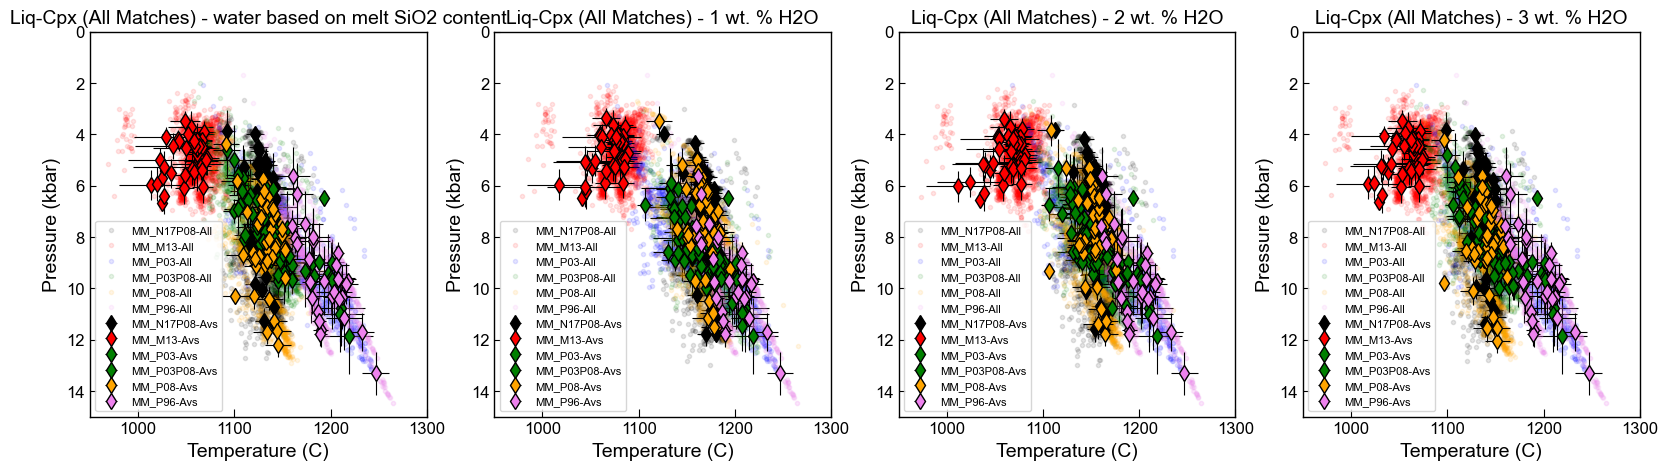

In [122]:
#Plot all matches and averages

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(20, 5))

# Subplot 1 (following Scruggs and Putirka (2017), we set water based on melt SiO2 content)

ax1.plot(MM_N17P08_All['T_K_calc']-273.15, MM_N17P08_All['P_kbar_calc'], '.', color='black', alpha=0.1, label='MM_N17P08-All')

ax1.errorbar(MM_N17P08_Avs['Mean_T_K_calc']-273.15,  MM_N17P08_Avs['Mean_P_kbar_calc'],
             xerr=MM_N17P08_Avs['Std_T_K_calc'], yerr=MM_N17P08_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='black', ms=8, mec='k', label='MM_N17P08-Avs')


ax1.plot(MM_M13_All['T_K_calc']-273.15, MM_M13_All['P_kbar_calc'], '.', color='red', alpha=0.1, label='MM_M13-All')

ax1.errorbar(MM_M13_Avs['Mean_T_K_calc']-273.15,  MM_M13_Avs['Mean_P_kbar_calc'],
             xerr=MM_M13_Avs['Std_T_K_calc'], yerr=MM_M13_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=8, mec='k', label='MM_M13-Avs')


ax1.plot(MM_P03_All['T_K_calc']-273.15, MM_P03_All['P_kbar_calc'], '.', color='blue', alpha=0.1, label='MM_P03-All')

ax1.errorbar(MM_P03_Avs['Mean_T_K_calc']-273.15,  MM_P03_Avs['Mean_P_kbar_calc'],
             xerr=MM_P03_Avs['Std_T_K_calc'], yerr=MM_P03_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='green', ms=8, mec='k', label='MM_P03-Avs')


ax1.plot(MM_P03P08_All['T_K_calc']-273.15, MM_P03P08_All['P_kbar_calc'], '.', color='green', alpha=0.1, label='MM_P03P08-All')

ax1.errorbar(MM_P03P08_Avs['Mean_T_K_calc']-273.15,  MM_P03P08_Avs['Mean_P_kbar_calc'],
             xerr=MM_P03P08_Avs['Std_T_K_calc'], yerr=MM_P03P08_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='green', ms=8, mec='k', label='MM_P03P08-Avs')


ax1.plot(MM_P08_All['T_K_calc']-273.15, MM_P08_All['P_kbar_calc'], '.', color='orange', alpha=0.1, label='MM_P08-All')

ax1.errorbar(MM_P08_Avs['Mean_T_K_calc']-273.15,  MM_P08_Avs['Mean_P_kbar_calc'],
             xerr=MM_P08_Avs['Std_T_K_calc'], yerr=MM_P08_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='orange', ms=8, mec='k', label='MM_P08-Avs')

ax1.plot(MM_P96_All['T_K_calc']-273.15, MM_P96_All['P_kbar_calc'], '.', color='violet', alpha=0.1, label='MM_P96-All')

ax1.errorbar(MM_P96_Avs['Mean_T_K_calc']-273.15,  MM_P96_Avs['Mean_P_kbar_calc'],
             xerr=MM_P96_Avs['Std_T_K_calc'], yerr=MM_P96_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='violet', ms=8, mec='k', label='MM_P96-Avs')


ax1.set_xlim([950, 1300])
ax1.set_ylim([0, 15])
ax1.invert_yaxis()
ax1.legend(loc='lower left', prop = {"size": 8})
ax1.set_title('Liq-Cpx (All Matches) - water based on melt SiO2 content')

ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (kbar)')



# Subplot 2 (we set 1 wt.% water content) 

ax2.plot(MM_N17P08_1H20_All['T_K_calc']-273.15, MM_N17P08_1H20_All['P_kbar_calc'], '.', color='black', alpha=0.1, label='MM_N17P08-All')

ax2.errorbar(MM_N17P08_1H20_Avs['Mean_T_K_calc']-273.15,  MM_N17P08_1H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_N17P08_1H20_Avs['Std_T_K_calc'], yerr=MM_N17P08_1H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='black', ms=8, mec='k', label='MM_N17P08-Avs')


ax2.plot(MM_M13_1H20_All['T_K_calc']-273.15, MM_M13_1H20_All['P_kbar_calc'], '.', color='red', alpha=0.1, label='MM_M13-All')

ax2.errorbar(MM_M13_1H20_Avs['Mean_T_K_calc']-273.15,  MM_M13_1H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_M13_1H20_Avs['Std_T_K_calc'], yerr=MM_M13_1H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=8, mec='k', label='MM_M13-Avs')


ax2.plot(MM_P03_1H20_All['T_K_calc']-273.15, MM_P03_1H20_All['P_kbar_calc'], '.', color='blue', alpha=0.1, label='MM_P03-All')

ax2.errorbar(MM_P03_1H20_Avs['Mean_T_K_calc']-273.15,  MM_P03_1H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_P03_1H20_Avs['Std_T_K_calc'], yerr=MM_P03_1H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='green', ms=8, mec='k', label='MM_P03-Avs')


ax2.plot(MM_P03P08_1H20_All['T_K_calc']-273.15, MM_P03P08_1H20_All['P_kbar_calc'], '.', color='green', alpha=0.1, label='MM_P03P08-All')

ax2.errorbar(MM_P03P08_1H20_Avs['Mean_T_K_calc']-273.15,  MM_P03P08_1H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_P03P08_1H20_Avs['Std_T_K_calc'], yerr=MM_P03P08_1H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='green', ms=8, mec='k', label='MM_P03P08-Avs')


ax2.plot(MM_P08_1H20_All['T_K_calc']-273.15, MM_P08_1H20_All['P_kbar_calc'], '.', color='orange', alpha=0.1, label='MM_P08-All')

ax2.errorbar(MM_P08_1H20_Avs['Mean_T_K_calc']-273.15,  MM_P08_1H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_P08_1H20_Avs['Std_T_K_calc'], yerr=MM_P08_1H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='orange', ms=8, mec='k', label='MM_P08-Avs')

ax2.plot(MM_P96_1H20_All['T_K_calc']-273.15, MM_P96_1H20_All['P_kbar_calc'], '.', color='violet', alpha=0.1, label='MM_P96-All')

ax2.errorbar(MM_P96_1H20_Avs['Mean_T_K_calc']-273.15,  MM_P96_1H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_P96_1H20_Avs['Std_T_K_calc'], yerr=MM_P96_1H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='violet', ms=8, mec='k', label='MM_P96-Avs')


ax2.set_xlim([950, 1300])
ax2.set_ylim([0, 15])
ax2.invert_yaxis()
ax2.legend(loc='lower left', prop = {"size": 8})
ax2.set_title('Liq-Cpx (All Matches) - 1 wt. % H2O')

ax2.set_xlabel('Temperature (C)')
ax2.set_ylabel('Pressure (kbar)')



# Subplot 3 (we set 2 wt.% water content) 

ax3.plot(MM_N17P08_2H20_All['T_K_calc']-273.15, MM_N17P08_2H20_All['P_kbar_calc'], '.', color='black', alpha=0.1, label='MM_N17P08-All')

ax3.errorbar(MM_N17P08_2H20_Avs['Mean_T_K_calc']-273.15,  MM_N17P08_2H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_N17P08_2H20_Avs['Std_T_K_calc'], yerr=MM_N17P08_2H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='black', ms=8, mec='k', label='MM_N17P08-Avs')


ax3.plot(MM_M13_2H20_All['T_K_calc']-273.15, MM_M13_2H20_All['P_kbar_calc'], '.', color='red', alpha=0.1, label='MM_M13-All')

ax3.errorbar(MM_M13_2H20_Avs['Mean_T_K_calc']-273.15,  MM_M13_2H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_M13_2H20_Avs['Std_T_K_calc'], yerr=MM_M13_2H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=8, mec='k', label='MM_M13-Avs')


ax3.plot(MM_P03_2H20_All['T_K_calc']-273.15, MM_P03_2H20_All['P_kbar_calc'], '.', color='blue', alpha=0.1, label='MM_P03-All')

ax3.errorbar(MM_P03_2H20_Avs['Mean_T_K_calc']-273.15, MM_P03_2H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_P03_2H20_Avs['Std_T_K_calc'], yerr=MM_P03_2H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='green', ms=8, mec='k', label='MM_P03-Avs')


ax3.plot(MM_P03P08_2H20_All['T_K_calc']-273.15, MM_P03P08_2H20_All['P_kbar_calc'], '.', color='green', alpha=0.1, label='MM_P03P08-All')

ax3.errorbar(MM_P03P08_2H20_Avs['Mean_T_K_calc']-273.15, MM_P03P08_2H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_P03P08_2H20_Avs['Std_T_K_calc'], yerr=MM_P03P08_2H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='green', ms=8, mec='k', label='MM_P03P08-Avs')


ax3.plot(MM_P08_2H20_All['T_K_calc']-273.15, MM_P08_2H20_All['P_kbar_calc'], '.', color='orange', alpha=0.1, label='MM_P08-All')

ax3.errorbar(MM_P08_2H20_Avs['Mean_T_K_calc']-273.15,  MM_P08_2H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_P08_2H20_Avs['Std_T_K_calc'], yerr=MM_P08_2H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='orange', ms=8, mec='k', label='MM_P08-Avs')

ax3.plot(MM_P96_2H20_All['T_K_calc']-273.15, MM_P96_2H20_All['P_kbar_calc'], '.', color='violet', alpha=0.1, label='MM_P96-All')

ax3.errorbar(MM_P96_2H20_Avs['Mean_T_K_calc']-273.15,  MM_P96_2H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_P96_2H20_Avs['Std_T_K_calc'], yerr=MM_P96_2H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='violet', ms=8, mec='k', label='MM_P96-Avs')


ax3.set_xlim([950, 1300])
ax3.set_ylim([0, 15])
ax3.invert_yaxis()
ax3.legend(loc='lower left', prop = {"size": 8})
ax3.set_title('Liq-Cpx (All Matches) - 2 wt. % H2O')

ax3.set_xlabel('Temperature (C)')
ax3.set_ylabel('Pressure (kbar)')



# Subplot 4 (we set 3 wt.% water content) 

ax4.plot(MM_N17P08_3H20_All['T_K_calc']-273.15, MM_N17P08_3H20_All['P_kbar_calc'], '.', color='black', alpha=0.1, label='MM_N17P08-All')

ax4.errorbar(MM_N17P08_3H20_Avs['Mean_T_K_calc']-273.15,  MM_N17P08_3H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_N17P08_3H20_Avs['Std_T_K_calc'], yerr=MM_N17P08_3H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='black', ms=8, mec='k', label='MM_N17P08-Avs')


ax4.plot(MM_M13_3H20_All['T_K_calc']-273.15, MM_M13_3H20_All['P_kbar_calc'], '.', color='red', alpha=0.1, label='MM_M13-All')

ax4.errorbar(MM_M13_3H20_Avs['Mean_T_K_calc']-273.15,  MM_M13_3H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_M13_3H20_Avs['Std_T_K_calc'], yerr=MM_M13_3H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=8, mec='k', label='MM_M13-Avs')


ax4.plot(MM_P03_3H20_All['T_K_calc']-273.15, MM_P03_3H20_All['P_kbar_calc'], '.', color='blue', alpha=0.1, label='MM_P03-All')

ax4.errorbar(MM_P03_3H20_Avs['Mean_T_K_calc']-273.15,  MM_P03_3H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_P03_3H20_Avs['Std_T_K_calc'], yerr=MM_P03_3H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='green', ms=8, mec='k', label='MM_P03-Avs')


ax4.plot(MM_P03P08_3H20_All['T_K_calc']-273.15, MM_P03P08_3H20_All['P_kbar_calc'], '.', color='green', alpha=0.1, label='MM_P03P08-All')

ax4.errorbar(MM_P03P08_3H20_Avs['Mean_T_K_calc']-273.15,  MM_P03P08_3H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_P03P08_3H20_Avs['Std_T_K_calc'], yerr=MM_P03P08_3H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='green', ms=8, mec='k', label='MM_P03P08-Avs')


ax4.plot(MM_P08_3H20_All['T_K_calc']-273.15, MM_P08_3H20_All['P_kbar_calc'], '.', color='orange', alpha=0.1, label='MM_P08-All')

ax4.errorbar(MM_P08_3H20_Avs['Mean_T_K_calc']-273.15,  MM_P08_3H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_P08_3H20_Avs['Std_T_K_calc'], yerr=MM_P08_3H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='orange', ms=8, mec='k', label='MM_P08-Avs')

ax4.plot(MM_P96_3H20_All['T_K_calc']-273.15, MM_P96_3H20_All['P_kbar_calc'], '.', color='violet', alpha=0.1, label='MM_P96-All')

ax4.errorbar(MM_P96_3H20_Avs['Mean_T_K_calc']-273.15,  MM_P96_3H20_Avs['Mean_P_kbar_calc'],
             xerr=MM_P96_3H20_Avs['Std_T_K_calc'], yerr=MM_P96_3H20_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='violet', ms=8, mec='k', label='MM_P96-Avs')


ax4.set_xlim([950, 1300])
ax4.set_ylim([0, 15])
ax4.invert_yaxis()
ax4.legend(loc='lower left', prop = {"size": 8})
ax4.set_title('Liq-Cpx (All Matches) - 3 wt. % H2O')

ax4.set_xlabel('Temperature (C)')
ax4.set_ylabel('Pressure (kbar)')

#fig.savefig('AllMatches_PT.png', dpi=1200)

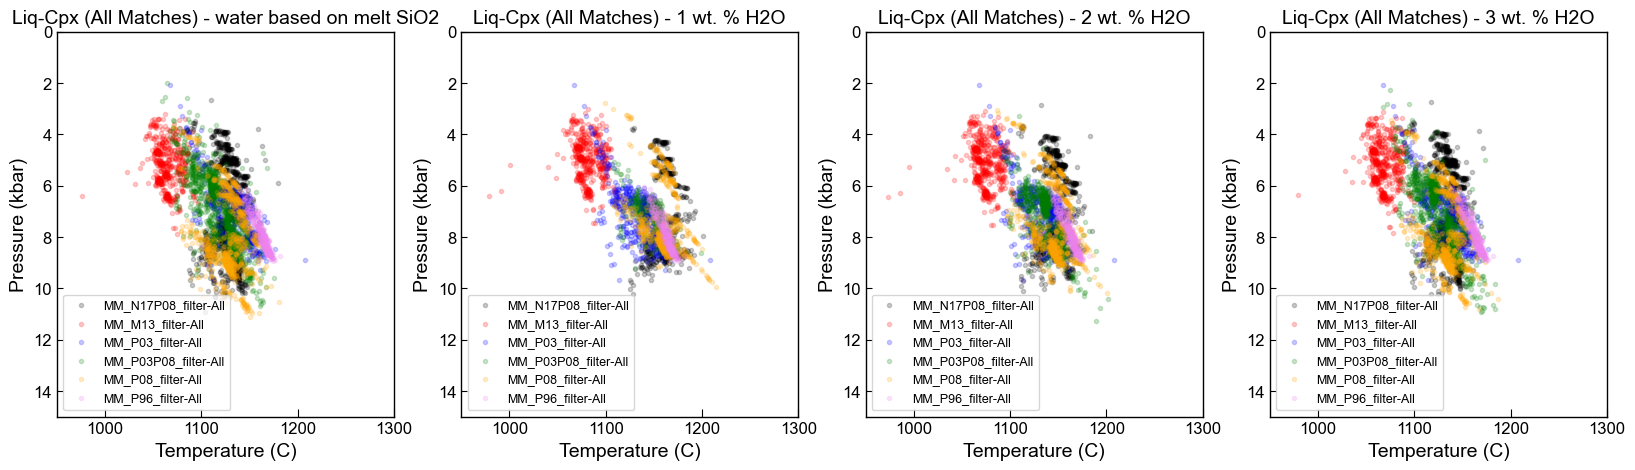

In [123]:
#Plot  all matches filtered with Eq test Neave 17 true

fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(20, 5))

# Subplot 1 (following Scruggs and Putirka (2017), we set water based on melt SiO2 content)

ax1.plot(MM_N17P08_All_filter['T_K_calc']-273.15, MM_N17P08_All_filter['P_kbar_calc'], '.', color='black', alpha=0.2, label='MM_N17P08_filter-All')


ax1.plot(MM_M13_All_filter['T_K_calc']-273.15, MM_M13_All_filter['P_kbar_calc'], '.', color='red', alpha=0.2, label='MM_M13_filter-All')


ax1.plot(MM_P03_All_filter['T_K_calc']-273.15, MM_P03_All_filter['P_kbar_calc'], '.', color='blue', alpha=0.2, label='MM_P03_filter-All')


ax1.plot(MM_P03P08_All_filter['T_K_calc']-273.15, MM_P03P08_All_filter['P_kbar_calc'], '.', color='green', alpha=0.2, label='MM_P03P08_filter-All')


ax1.plot(MM_P08_All_filter['T_K_calc']-273.15, MM_P08_All_filter['P_kbar_calc'], '.', color='orange', alpha=0.2, label='MM_P08_filter-All')


ax1.plot(MM_P96_All_filter['T_K_calc']-273.15, MM_P96_All_filter['P_kbar_calc'], '.', color='violet', alpha=0.2, label='MM_P96_filter-All')


ax1.set_xlim([950, 1300])
ax1.set_ylim([0, 15])
ax1.invert_yaxis()
ax1.legend(loc='lower left', prop = {"size": 9})
ax1.set_title('Liq-Cpx (All Matches) - water based on melt SiO2')

ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (kbar)')



# Subplot 2 (we set 1 wt.% water content) 

ax2.plot(MM_N17P08_1H20_All_filter['T_K_calc']-273.15, MM_N17P08_1H20_All_filter['P_kbar_calc'], '.', color='black', alpha=0.2, label='MM_N17P08_filter-All')


ax2.plot(MM_M13_1H20_All_filter['T_K_calc']-273.15, MM_M13_1H20_All_filter['P_kbar_calc'], '.', color='red', alpha=0.2, label='MM_M13_filter-All')


ax2.plot(MM_P03_1H20_All_filter['T_K_calc']-273.15, MM_P03_1H20_All_filter['P_kbar_calc'], '.', color='blue', alpha=0.2, label='MM_P03_filter-All')


ax2.plot(MM_P03P08_1H20_All_filter['T_K_calc']-273.15, MM_P03P08_1H20_All_filter['P_kbar_calc'], '.', color='green', alpha=0.2, label='MM_P03P08_filter-All')


ax2.plot(MM_P08_1H20_All_filter['T_K_calc']-273.15, MM_P08_1H20_All_filter['P_kbar_calc'], '.', color='orange', alpha=0.2, label='MM_P08_filter-All')


ax2.plot(MM_P96_1H20_All_filter['T_K_calc']-273.15, MM_P96_1H20_All_filter['P_kbar_calc'], '.', color='violet', alpha=0.2, label='MM_P96_filter-All')


ax2.set_xlim([950, 1300])
ax2.set_ylim([0, 15])
ax2.invert_yaxis()
ax2.legend(loc='lower left', prop = {"size": 9})
ax2.set_title('Liq-Cpx (All Matches) - 1 wt. % H2O')

ax2.set_xlabel('Temperature (C)')
ax2.set_ylabel('Pressure (kbar)')



# Subplot 3 (we set 2 wt.% water content) 

ax3.plot(MM_N17P08_2H20_All_filter['T_K_calc']-273.15, MM_N17P08_2H20_All_filter['P_kbar_calc'], '.', color='black', alpha=0.2, label='MM_N17P08_filter-All')


ax3.plot(MM_M13_2H20_All_filter['T_K_calc']-273.15, MM_M13_2H20_All_filter['P_kbar_calc'], '.', color='red', alpha=0.2, label='MM_M13_filter-All')


ax3.plot(MM_P03_2H20_All_filter['T_K_calc']-273.15, MM_P03_2H20_All_filter['P_kbar_calc'], '.', color='blue', alpha=0.2, label='MM_P03_filter-All')


ax3.plot(MM_P03P08_2H20_All_filter['T_K_calc']-273.15, MM_P03P08_2H20_All_filter['P_kbar_calc'], '.', color='green', alpha=0.2, label='MM_P03P08_filter-All')


ax3.plot(MM_P08_2H20_All_filter['T_K_calc']-273.15, MM_P08_2H20_All_filter['P_kbar_calc'], '.', color='orange', alpha=0.2, label='MM_P08_filter-All')


ax3.plot(MM_P96_2H20_All_filter['T_K_calc']-273.15, MM_P96_2H20_All_filter['P_kbar_calc'], '.', color='violet', alpha=0.2, label='MM_P96_filter-All')


ax3.set_xlim([950, 1300])
ax3.set_ylim([0, 15])
ax3.invert_yaxis()
ax3.legend(loc='lower left', prop = {"size": 9})
ax3.set_title('Liq-Cpx (All Matches) - 2 wt. % H2O')

ax3.set_xlabel('Temperature (C)')
ax3.set_ylabel('Pressure (kbar)')



# Subplot 4 (we set 3 wt.% water content) 

ax4.plot(MM_N17P08_3H20_All_filter['T_K_calc']-273.15, MM_N17P08_3H20_All_filter['P_kbar_calc'], '.', color='black', alpha=0.2, label='MM_N17P08_filter-All')


ax4.plot(MM_M13_3H20_All_filter['T_K_calc']-273.15, MM_M13_3H20_All_filter['P_kbar_calc'], '.', color='red', alpha=0.2, label='MM_M13_filter-All')


ax4.plot(MM_P03_3H20_All_filter['T_K_calc']-273.15, MM_P03_3H20_All_filter['P_kbar_calc'], '.', color='blue', alpha=0.2, label='MM_P03_filter-All')


ax4.plot(MM_P03P08_3H20_All_filter['T_K_calc']-273.15, MM_P03P08_3H20_All_filter['P_kbar_calc'], '.', color='green', alpha=0.2, label='MM_P03P08_filter-All')


ax4.plot(MM_P08_3H20_All_filter['T_K_calc']-273.15, MM_P08_3H20_All_filter['P_kbar_calc'], '.', color='orange', alpha=0.2, label='MM_P08_filter-All')


ax4.plot(MM_P96_3H20_All_filter['T_K_calc']-273.15, MM_P96_3H20_All_filter['P_kbar_calc'], '.', color='violet', alpha=0.2, label='MM_P96_filter-All')


ax4.set_xlim([950, 1300])
ax4.set_ylim([0, 15])
ax4.invert_yaxis()
ax4.legend(loc='lower left', prop = {"size": 9})
ax4.set_title('Liq-Cpx (All Matches) - 3 wt. % H2O')

ax4.set_xlabel('Temperature (C)')
ax4.set_ylabel('Pressure (kbar)')

fig.savefig('AllMatches_filtered_PT.png', dpi=1200)